### Keras API Task

In [1]:
from tensorflow.keras.datasets import mnist

mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


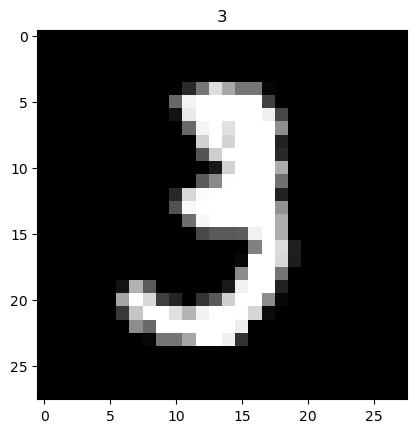

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[10], cmap = 'gray')
plt.title(train_targets[10])
plt.show()

In [4]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images/255.0, dtype= np.float32)
    targets = np.array(targets, dtype = np.float32)

    return images, targets 
    
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [8]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8375 - loss: 0.5700
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9612 - loss: 0.1347
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.9710 - loss: 0.0978
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.9773 - loss: 0.0751
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9825 - loss: 0.0581
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.9842 - loss: 0.0487
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.9875 - loss: 0.0392
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9894 - loss: 0.0333
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.9908 - loss: 0.0280
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.9933 - loss: 0.0220
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.9940 - loss: 0.0209
Epoch 12/20
938/938 ━━━━━━━━━━

In [9]:
pred_prob = model.predict(np.expand_dims(test_images[5094], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.6029742e-11 2.7505578e-09 7.3268360e-09 1.9623644e-06 3.8649994e-10
  2.2687978e-11 2.0208196e-21 9.9999595e-01 9.0760527e-10 2.1376090e-06]]


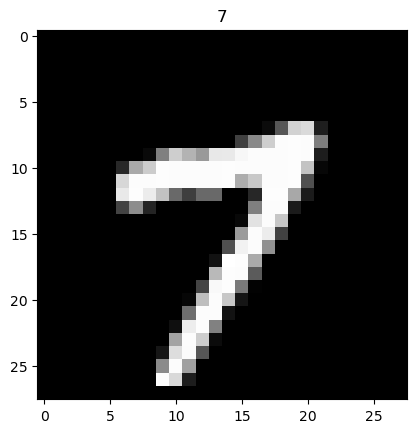

In [10]:
import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]

plt.imshow(test_images[5094], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [11]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9735 - loss: 0.1356


[0.11441871523857117, 0.9771999716758728]

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9121 - loss: 0.2947 - val_accuracy: 0.9465 - val_loss: 0.1798
Epoch 2/20
1500/1500 - 1s - 770us/step - accuracy: 0.9617 - loss: 0.1287 - val_accuracy: 0.9572 - val_loss: 0.1412
Epoch 3/20
1500/1500 - 1s - 739us/step - accuracy: 0.9707 - loss: 0.0929 - val_accuracy: 0.9638 - val_loss: 0.1256
Epoch 4/20
1500/1500 - 1s - 741us/step - accuracy: 0.9777 - loss: 0.0713 - val_accuracy: 0.9668 - val_loss: 0.1143
Epoch 5/20
1500/1500 - 1s - 762us/step - accuracy: 0.9819 - loss: 0.0565 - val_accuracy: 0.9700 - val_loss: 0.1100
Epoch 6/20
1500/1500 - 1s - 773us/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9672 - val_loss: 0.1090
Epoch 7/20
1500/1500 - 1s - 778us/step - accuracy: 0.9873 - loss: 0.0382 - val_accuracy: 0.9698 - val_loss: 0.1159
Epoch 8/20
1500/1500 - 1s - 804us/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9688 - val_loss: 0.1253
Epoch 9/20
1500/1500 - 1s - 820us/step - accuracy: 0.9900 - loss: 0.0299 - val_acc

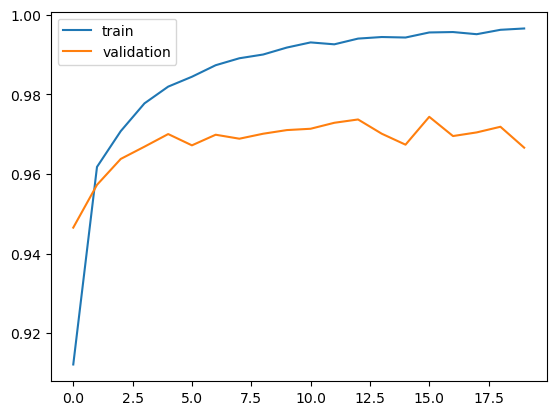

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


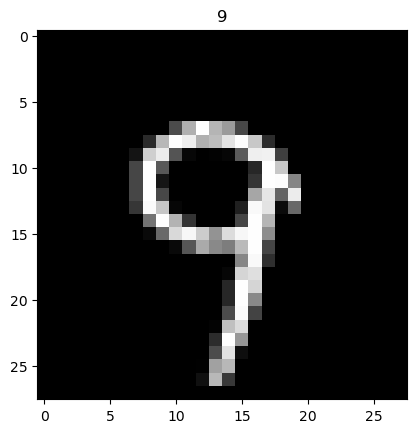

In [16]:
pred_prob = model.predict(np.expand_dims(test_images[2345], axis=0))

import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]

plt.imshow(test_images[2345], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [17]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9623 - loss: 0.2261


[0.18497906625270844, 0.9674999713897705]

In [18]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape = (INPUT_SIZE,INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs = input_tensor, outputs = output)
    return model

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images/255.0, dtype= np.float32)
    targets = np.array(targets, dtype = np.float32)

    return images, targets 

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [20]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets,test_images, test_targets)

print(train_images.shape,train_oh_targets.shape)
print(validation_images.shape,validation_oh_targets.shape)
print(test_images.shape,test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [21]:
model = create_model()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [23]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8249 - loss: 0.6094 - val_accuracy: 0.9458 - val_loss: 0.1851
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.9540 - loss: 0.1568 - val_accuracy: 0.9589 - val_loss: 0.1329
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9662 - loss: 0.1118 - val_accuracy: 0.9629 - val_loss: 0.1174
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.9746 - loss: 0.0842 - val_accuracy: 0.9699 - val_loss: 0.1009
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.9805 - loss: 0.0637 - val_accuracy: 0.9709 - val_loss: 0.0959
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.9824 - loss: 0.0571 - val_accuracy: 0.9714 - val_loss: 0.0916
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.9856 - loss: 0.0450 - val_accuracy: 0.9696 - val_loss: 0.0954
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9872 - loss: 0.0386 - va

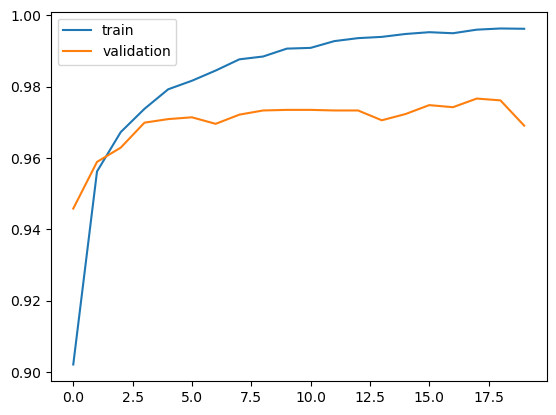

In [24]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


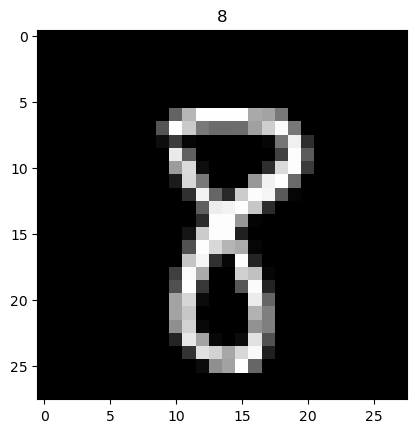

In [25]:
pred_prob = model.predict(np.expand_dims(test_images[4545], axis=0))

import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]

plt.imshow(test_images[4545], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [28]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.9666 - loss: 0.1602


[0.13934044539928436, 0.9711999893188477]